## Modelo de regressão para previsão da taxa de rendimento bruto de um título do tesouro direto se comprar em um mês e vender no próximo com base em indicadores técnicos calculados

In [24]:
# importar de bibliotecas
# data
import numpy as np
import pandas as pd

# stat
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

# ml
from keras import models
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando as opções de impressão
np.set_printoptions(suppress=True)

In [25]:
# Função para identificar os outliers
def identificar_nao_outliers(vetor):
    # Calcular o primeiro e terceiro quartis
    q1 = np.percentile(vetor, 25)
    q3 = np.percentile(vetor, 75)

    # Calcular a amplitude interquartil (IQR)
    iqr = q3 - q1

    # Definir limites para outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Identificar outliers
    nao_outliers = (vetor >= limite_inferior) | (vetor >= limite_superior)

    return nao_outliers

In [37]:
# Dados de treino e teste 
X_test = pd.read_csv('X_test_reg.csv', sep = ';').values
y_test = pd.read_csv('y_test_reg.csv', sep = ';').values

In [38]:
X_test.shape

(19255, 47)

In [39]:
y_test.shape

(19255, 1)

In [40]:
# Carregar o modelo
model = load_model('model_reg.keras')

In [41]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 512)               24576     
                                                                 
 dropout_112 (Dropout)       (None, 512)               0         
                                                                 
 dense_129 (Dense)           (None, 512)               262656    
                                                                 
 dropout_113 (Dropout)       (None, 512)               0         
                                                                 
 dense_130 (Dense)           (None, 256)               131328    
                                                                 
 dropout_114 (Dropout)       (None, 256)               0         
                                                                 
 dense_131 (Dense)           (None, 256)             

- Gráfico com o mean absolute error de treinamento e validação.

<img src = 'model_reg_mae_train_val.png'/>

In [42]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

602/602 [==============================] - 2s 2ms/step - loss: 7.8689 - mae: 1.4851


In [43]:
test_mae_score

1.485061764717102

In [44]:
y_pred = model.predict(X_test)

602/602 [==============================] - 1s 2ms/step


In [45]:
# Coeficiente de determinação
r2 = r2_score(y_test, y_pred)
print('coeficiente de determinação do modelo: ', r2)

coeficiente de determinação do modelo:  0.6952165807779321


In [46]:
# Correlação de pearson
corr, p_value = spearmanr(y_test, y_pred)
print('correlação entre teste e predição: ', corr)

correlação entre teste e predição:  0.6897672260826719


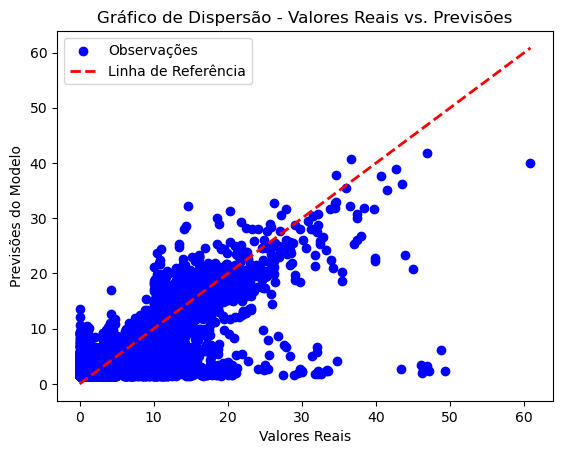

In [47]:
# Criar um gráfico de dispersão
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Observações')

# Adicionar linha de referência diagonal para comparação
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Linha de Referência')

# Adicionar rótulos e título
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão - Valores Reais vs. Previsões')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

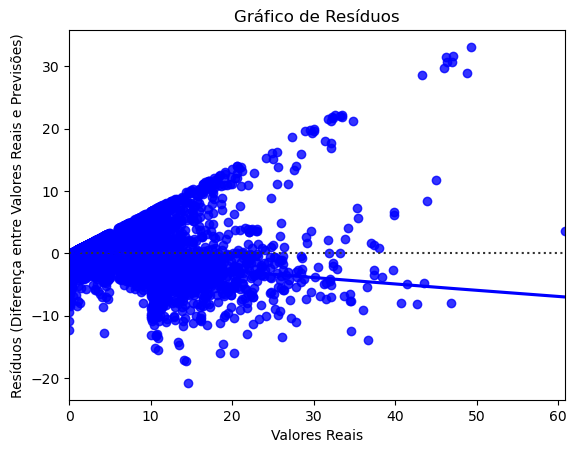

In [48]:
# Calcular os resíduos (diferença entre os valores reais e previsões)
residuals = [true - pred for true, pred in zip(y_test, y_pred)]

# Criar um gráfico de resíduos usando a biblioteca Seaborn
sns.residplot(x=y_test, y=residuals, lowess=True, color='blue')

# Adicionar rótulos e título
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos (Diferença entre Valores Reais e Previsões)')
plt.title('Gráfico de Resíduos')

# Mostrar o gráfico
plt.show()

In [49]:
# Média dos resíduos
np.mean(residuals)

-0.08870275912541334

In [50]:
# Desvio padrão dos resíduos
np.std(residuals)

2.6351745116122087